<h1>Mohammad Mehdi Dadkhah Tehrani</h1>

<h2>Import Library:</h2>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

<h2>Data Definition:</h2>

In [10]:
def generate_data():
    data = pd.read_csv('dataset1.txt')
    X = data['X'].to_numpy()
    Y = data['Y'].to_numpy()
    return X,Y

In [12]:
data = pd.read_csv('dataset1.txt')
data

,X,Y
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


<h3>Result:</h3>

In [3]:
X,Y = generate_data()
print(f'X:{X}')
print(f'Y:{Y}')

X:[ 6.1101  5.5277  8.5186  7.0032  5.8598  8.3829  7.4764  8.5781  6.4862
  5.0546  5.7107 14.164   5.734   8.4084  5.6407  5.3794  6.3654  5.1301
  6.4296  7.0708  6.1891 20.27    5.4901  6.3261  5.5649 18.945  12.828
 10.957  13.176  22.203   5.2524  6.5894  9.2482  5.8918  8.2111  7.9334
  8.0959  5.6063 12.836   6.3534  5.4069  6.8825 11.708   5.7737  7.8247
  7.0931  5.0702  5.8014 11.7     5.5416  7.5402  5.3077  7.4239  7.6031
  6.3328  6.3589  6.2742  5.6397  9.3102  9.4536  8.8254  5.1793 21.279
 14.908  18.959   7.2182  8.2951 10.236   5.4994 20.341  10.136   7.3345
  6.0062  7.2259  5.0269  6.5479  7.5386  5.0365 10.274   5.1077  5.7292
  5.1884  6.3557  9.7687  6.5159  8.5172  9.1802  6.002   5.5204  5.0594
  5.7077  7.6366  5.8707  5.3054  8.2934 13.394   5.4369]
Y:[17.592    9.1302  13.662   11.854    6.8233  11.886    4.3483  12.
  6.5987   3.8166   3.2522  15.505    3.1551   7.2258   0.71618  3.5129
  5.3048   0.56077  3.6518   5.3893   3.1386  21.767    4.263    5.187

<h2>Find Theta:</h2>

In [4]:
def find_theta():
    X,Y = generate_data()
    m = len(Y)
    X = np.c_[np.ones(m) , X]
    theta = np.linalg.inv(X.T @ X) @ X.T @ Y
    return theta

<h3>Result:</h3>

In [5]:
theta = find_theta()
print(theta)

[-3.89578088  1.19303364]


<h2>Data Scatter:</h2>

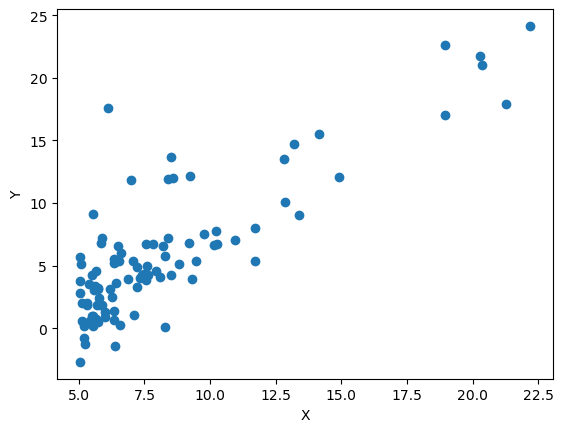

In [6]:
X,Y = generate_data()
plt.scatter(X,Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

<h2>Close Form:</h2>

In [8]:
def close_form():
    X,Y = generate_data()
    n = len(X)
    
    #parameter Model
    slope_close = 0
    intercept_close = 0
    learning_rate_close = 0.01
    epochs_close = 1500
    
    #MSE
    for _ in range(epochs_close):
        Y_pred = slope_close * X + intercept_close
        mse = np.mean((Y_pred - Y) ** 2)
        gradient_slope_close = (2/n) * np.sum((Y_pred - Y) * X)
        gradient_intercept_close = (2/n) * np.sum(Y_pred - Y)
        
        #update parameter
        slope_close -= learning_rate_close * gradient_slope_close
        intercept_close -= learning_rate_close * gradient_intercept_close
        
    return slope_close,intercept_close

In [11]:
slope_close,intercept_close = close_form()
print(f'theta1 = {slope_close}')
print(f'theta0 = {intercept_close}')

theta1 = 1.191261194638165
theta0 = -3.878137690865592


In [12]:
slope_close,intercept_close = close_form()
p1 = slope_close * 6.2 + intercept_close
p2 = slope_close * 12.8 + intercept_close
p3 = slope_close * 22.1 + intercept_close
p4 = slope_close * 30 + intercept_close

In [13]:
print(f'p1 = {p1}')
print(f'p2 = {p2}')
print(f'p3 = {p3}')
print(f'p4 = {p4}')

p1 = 3.5076817158910316
p2 = 11.370005600502921
p3 = 22.448734710637858
p4 = 31.859698148279357


<h3>Plot Close Form:</h3>

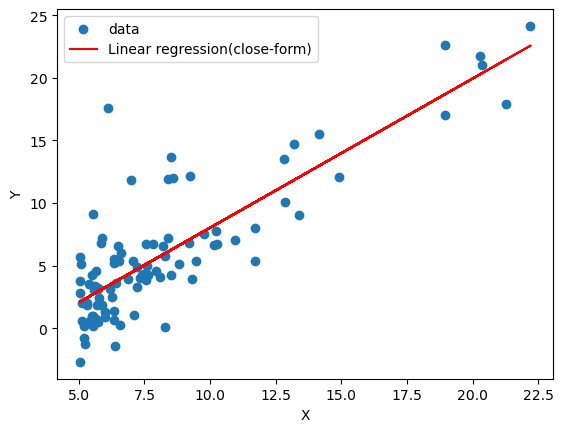

In [14]:
slope_close,intercept_close = close_form()
plt.scatter(X,Y,label = 'data')
plt.plot(X,slope_close * X + intercept_close,color = 'red',label = 'Linear regression(close-form)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

<h2>Online Mode:</h2>

In [36]:
def online_mode():
    X,Y = generate_data()
    n = len(X)
    
    #parameter Model
    slope_online = 0
    intercept_online = 0
    learning_rate_online = 0.01
    interations_online = 1500
    
    #Model training
    for _ in range(interations_online):
        random_index = np.random.randint(0,n)
        X_random = X[random_index]
        Y_random = Y[random_index]
        
        Y_pred = slope_online * X_random + intercept_online
        error = Y_pred - Y_random
        
        slope_online -= learning_rate_online * error * X_random
        intercept_online -= learning_rate_online * error
        
    return slope_online,intercept_online

In [37]:
slope_online,intercept_online = online_mode()
print(f'theta1 = {slope_online}')
print(f'theta0 = {intercept_online}')

theta1 = 1.4724831881800067
theta0 = -3.383070782517536


<h3>Predict:</h3>

In [38]:
slope_online,intercept_online = online_mode()
p1 = slope_online * 6.2 + intercept_online
p2 = slope_online * 12.8 + intercept_online
p3 = slope_online * 22.1 + intercept_online
p4 = slope_online * 30 + intercept_online

In [39]:
print(f'p1 = {p1}')
print(f'p2 = {p2}')
print(f'p3 = {p3}')
print(f'p4 = {p4}')

p1 = 2.311182318232107
p2 = 8.51010988947305
p3 = 17.24496237622165
p4 = 24.664890832707016


<h3>Plot the cost function 𝐽(θ) along the epochs</h3>

In [40]:
def predict(X,slope_online):
    h_theta = X*slope_online
    
    return h_theta

In [41]:
def cost_online(h_theta,Y):
    m=Y.shape[0]
    j = (1/(2*m))*np.dot((h_theta-Y).T,(h_theta-Y))
    return j

In [42]:
def grad(X,h_theta,Y):
    m=Y.shape[0]
    grad = (1/m)*((h_theta-Y).T*X).T
    return grad

In [53]:
learning_rate=0.01
iterations = 1500
j_history=[]

In [54]:
for i in range(iterations):
    m = Y.shape[0]
    h_theta = predict(X,slope_online)
    cost = cost_online(h_theta,Y)
    grad = (1/m)*((h_theta-Y).T*X).T
    slope_online = slope_online-learning_rate*grad
    j_history.append(cost)
    #print("Epoch :",i,"Cost :",cost)

In [55]:
np.shape(j_history)

(1500,)

Text(0.5, 1.0, 'Cost function VS iterations')

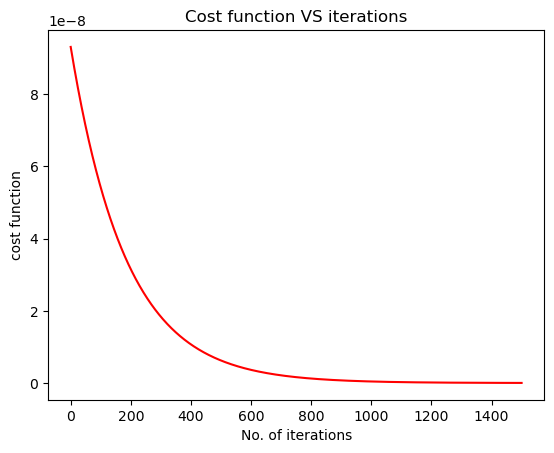

In [56]:
x=np.linspace(0,iterations,iterations)
plt.ylabel('cost function') 
plt.plot(x,j_history,color='r') 
plt.xlabel('No. of iterations')
plt.title('Cost function VS iterations')

<h3>Plot Online Mode:</h3>

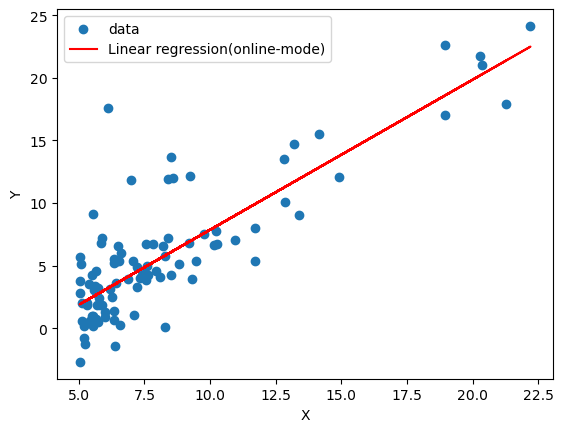

In [57]:
slope_online,intercept_online = online_mode()
plt.scatter(X,Y,label = 'data')
plt.plot(X,slope_online * X + intercept_online,color = 'red',label = 'Linear regression(online-mode)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

<h2>Batch Mode:</h2>

In [58]:
def batch_mode():
    X,Y = generate_data()
    n = len(X)
    
    #parameter Model
    slope_batch = 0
    intercept_batch = 0
    learning_rate_batch = 0.01
    iterations_batch = 1500
    
    #Model training
    for _ in range(iterations_batch):
        Y_pred = slope_batch * X + intercept_batch
        error = Y_pred - Y
        
        gradient_slope_batch = (2/n) * np.sum(error * X)
        gradient_intercept_batch = (2/n) * np.sum(error)
        
        slope_batch -= learning_rate_batch * gradient_slope_batch
        intercept_batch -= learning_rate_batch * gradient_intercept_batch
        
    return slope_batch,intercept_batch

<h3>Predict:</h3>

In [59]:
slope_batch,intercept_batch = batch_mode()
p1 = slope_batch * 6.2 + intercept_batch
p2 = slope_batch * 12.8 + intercept_batch
p3 = slope_batch * 22.1 + intercept_batch
p4 = slope_batch * 30 + intercept_batch

In [60]:
print(f'p1 = {p1}')
print(f'p2 = {p2}')
print(f'p3 = {p3}')
print(f'p4 = {p4}')

p1 = 3.5076817158910316
p2 = 11.370005600502921
p3 = 22.448734710637858
p4 = 31.859698148279357


<h3>Plot the cost function 𝐽(θ) along the epochs:</h3>

In [61]:
def predict(X,slope_batch):
    h_theta = X*slope_batch
    
    return h_theta

In [62]:
def cost_batch(h_theta,Y):
    m=Y.shape[0]
    j = (1/(2*m))*np.dot((h_theta-Y).T,(h_theta-Y))
    return j

In [63]:
def grad(X,h_theta,Y):
    m=Y.shape[0]
    grad = (1/m)*((h_theta-Y).T*X).T
    return grad

In [64]:
learning_rate=0.01
iterations = 1500
j_history=[]

In [65]:
for i in range(iterations):
    h_theta = predict(X,slope_batch)
    cost = cost_batch(h_theta,Y)
    grad = (1/m)*((h_theta-Y).T*X).T
    slope_batch = slope_batch-learning_rate*grad
    j_history.append(cost)
    #print("Epoch :",i,"Cost :",cost)

In [66]:
np.shape(j_history)

(1500,)

Text(0.5, 1.0, 'cost function VS iterations')

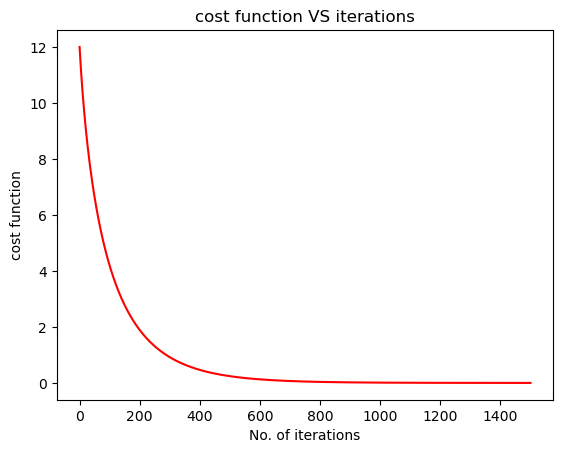

In [67]:
x=np.linspace(0,iterations,iterations)
plt.ylabel('cost function') 
plt.plot(x,j_history,color='r') 
plt.xlabel('No. of iterations')
plt.title('cost function VS iterations')

<h3>Plot Batch Mode:</h3>

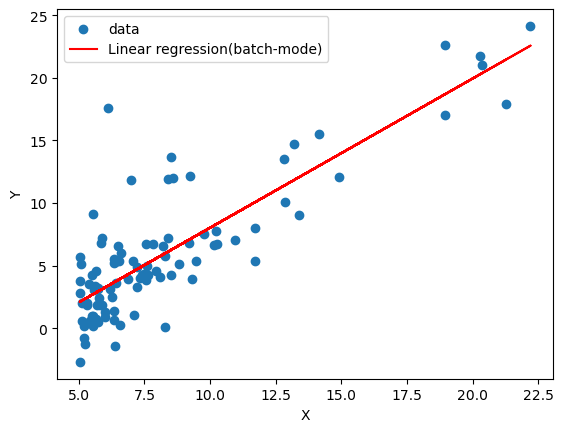

In [68]:
slope_batch,intercept_batch = batch_mode()
plt.scatter(X,Y,label = 'data')
plt.plot(X,slope_batch * X + intercept_batch,color = 'red',label = 'Linear regression(batch-mode)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

<h2>Plot Close-Form,Online-Mode,Batch-Mode</h2>

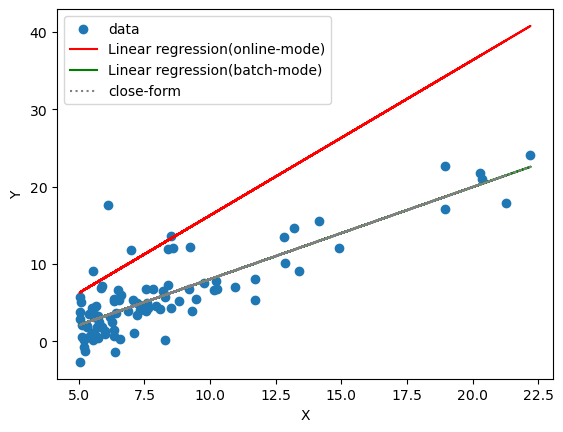

In [69]:
slope_close,intercept_close = close_form()
slope_online,intercept_online = online_mode()
slope_batch,intercept_batch = batch_mode()
plt.scatter(X,Y,label = 'data')
plt.plot(X,slope_online * X + intercept_online,color = 'red',label = 'Linear regression(online-mode)')
plt.plot(X,slope_batch * X + intercept_batch,color = 'green',label = 'Linear regression(batch-mode)')
plt.plot(X,slope_close * X + intercept_close,color = 'grey',label = 'close-form',linestyle='dotted')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

<h2>Which type of G.D. (online\batch) do you prefer here? Why?</h2>

In this matter, according to the arrangement of the data and the results obtained from online-mode, in my opinion, the batch-mode method is more suitable.

For this reason, I suggest batch-mode because our data range is small in this problem.

In my opinion, batch-mode shows a better result in this issue

Therefore, it is better to use this method.